Bootstrapping is a resampling method. In statistics, resampling entails the use of many samples generated from an original sample. 


In machine learning terms, the sample is our training data.

The main idea is to use the original sample as the population (the whole domain of our problem) and the generated sub-samples as samples


**Creating bootstrap samples**

To create bootstrap samples, we resample with replacement (each instance may be selected multiple times) from our original sample.

This means that a single instance can be selected multiple times. Suppose we have data for 100 individuals. The data contains the wieght and height of each individual. If we generate random numbers from 1 to 100 and add the correspoidng data to a new dataset, we have essentially created a bootstrap sample

In [1]:
# Step 1: Import libraries and data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
diabetes= load_diabetes()

In [2]:
# Step 2: Print the original sample's statistics
target = diabetes.target
print(np.mean(target))
print(np.std(target))

152.13348416289594
77.00574586945044


We then create the bootstrap samples and statistics and store them in bootstrap_stats. We could store the whole bootstrap samples, but it is not memory efficient to do so.

Furthermore, we can only care about the statistics, so it makes sense only to store them.


Here we create 10000 bootstrap samples and statistics

In [3]:
# Step 3: We need to create the bootstrap samples and statistics

bootstrap_stats =[]
for _ in range(10000):
  bootstrap_sample = np.random.choice(target, size=len(target))
  mean= np.mean(bootstrap_sample)
  std = np.std(bootstrap_sample)
  bootstrap_stats.append((mean, std))
bootstrap_stats = np.array(bootstrap_stats)

We can plot the histogram of the mean and standard deviation, as well as calculate the standard error (that is the standard deviation of the statistic's distributions) for each

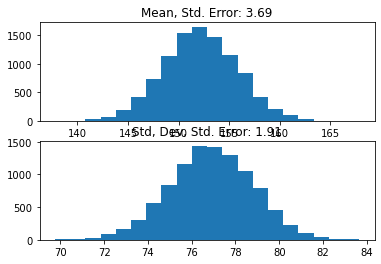

In [4]:
# Step 4:  plot the histogram of the mean and standard deviation, as well as calcualte the standard error 
plt.figure()
plt.subplot(2,1,1)
std_err = np.std(bootstrap_stats[:,0])
plt.title('Mean, Std. Error: %.2f'%std_err)
plt.hist(bootstrap_stats[:,0], bins=20)

plt.subplot(2,1,2)
std_err = np.std(bootstrap_stats[:,1])
plt.title('Std, Dev, Std. Error: %.2f'%std_err)
plt.hist(bootstrap_stats[:,1], bins=20)
plt.show()

Note that due to the inherent randomness of the process (for which instances will be selected for each bootstrap sample), the result may vary each time the procedure is executed. A higher number of bootstrap samples will help to stabilize the results. Nonetheless, it is a useful technique to calcualte the standard error, confidence intervals, and other statistics without making any assumptions about the underlying distribution.